In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:

"""
This function should process the video file.
Input: 
- file: the path to the video
Output:
- cut: vector of frame indices where cuts are detected
- grad: vector of tuples (start, end) of frame indices where gradations are detected
"""
def process_video(file: str):
    cut=[]
    grad=[]
    cap = cv2.VideoCapture(file)
    while(True):
        ret, frame = cap.read()
        if ret:
            #TODO : frame processing algorithm

            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break
    cap.release()
    cv2.destroyAllWindows()
    return cut, grad

"""
This function provides the ground truth for a given video file.
Input: 
- file: the path to the video
Output:
- cut: vector of frame indices where cuts happen
- grad: vector of tuples (start, end) of frame indices where gradations happen
"""
def read_groundtruth(file: str):
    cut=[]
    grad=[]
    f = open(file, "r")
    line = f.readline().split()
    while(line != []):
        if len(line)==1:
            cut.append(int(line[0]))
        elif len(line)==2:
            grad.append([int(line[0]), int(line[1])])
        line = f.readline().split()
    return cut, grad

#cut, grad = process_video('anni005.mpg')
#gt_cut, gt_grad = read_groundtruth('anni005.txt')

#TODO : results analysis


In [106]:
def gradient_sobel(image):
    Gx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5) 
    Gy = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
    
    return Gx, Gy

In [4]:
def edge_extraction(Gx, Gy, seuil):
    ForceGradient = np.sqrt(np.power(Gx,2)+np.power(Gy,2))
    aretes = ForceGradient>seuil
    
    return aretes

In [5]:
def dilatation(image):
    kernel = np.ones((3,3), np.uint8) 
    img_dilation = cv2.dilate(np.float32(image), kernel, iterations=1)
    
    return img_dilation

In [134]:
def compare(img1, img2):
    img1_dilated = dilatation(img1)
    img2_dilated = dilatation(img2)
    up = 0
    down = 0
    for i in range(len(img1_dilated)):
        up += np.dot(img1_dilated[i].astype(int), img2[i].astype(int))
    for i in range(len(img2)):
        for j in range(len(img2[0])):
            down += int(img2[i][j])
    pin = 1 - (up/down)
    up = 0
    down = 0
    for i in range(len(img1)):
        up += np.dot(img1[i].astype(int), img2_dilated[i].astype(int))
    for i in range(len(img1)):
        for j in range(len(img1[0])):
            down += int(img1[i][j])
    pout = 1 - (up/down)
    
    return [pin, pout]

In [109]:
def find_aretes(vid_path):
    cap = cv2.VideoCapture(vid_path)
    aretes_all = []
    while(True):
        ret, frame = cap.read()
        if ret:
            grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            Gx, Gy = gradient_sobel(grayFrame)
            aretes = edge_extraction(Gx, Gy, 700)
            aretes_all.append(aretes)
        else:
            break  

    cap.release()
    cv2.destroyAllWindows()
    
    return aretes_all

In [138]:
# BE CAREFUL THESE $ LINES TAKE FOREVER TO COMPILE
aretes_all = find_aretes("anni009/anni009.mpg")
anni009_rho = []
for i in range(len(aretes_all) - 1):
    anni009_rho.append(compare(aretes_all[i], aretes_all[i+1]))

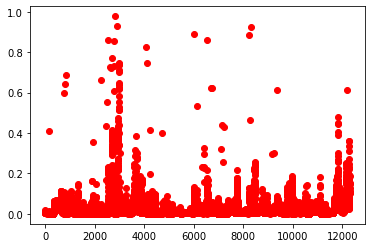

In [160]:
x = list(range(len(aretes_all)-1))
pin_list = [rho[0] for rho in anni009_rho]
plt.plot(x, pin_list, "ro")
